In [14]:
import torch
from ptolemy.images import load_mrc, Exposure
import ptolemy.algorithms as algorithms
import ptolemy.models as models

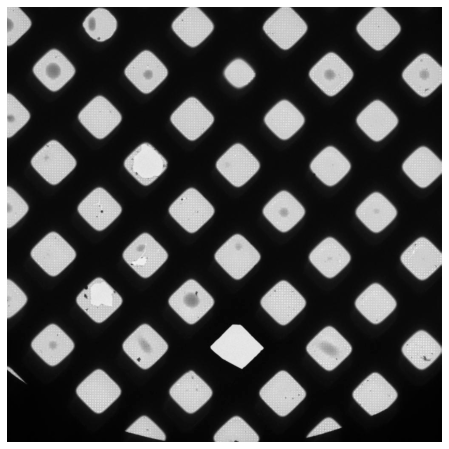

In [16]:
ex = load_mrc('example_')
ex = Exposure(ex)
ex.viz_image()

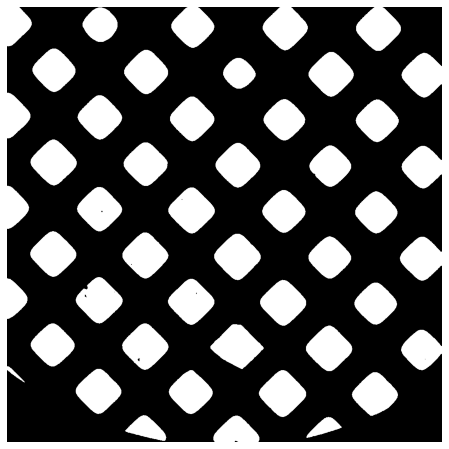

In [17]:
segmenter = algorithms.PMM_Segmenter()
ex.make_mask(segmenter)
ex.viz_mask()

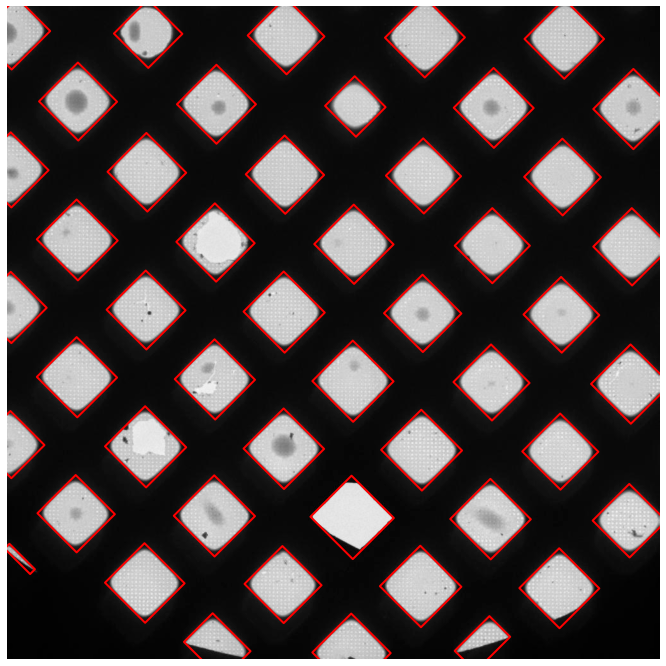

In [20]:
processor = algorithms.LowMag_Process_Mask()
ex.process_mask(processor)
ex.viz_boxes()

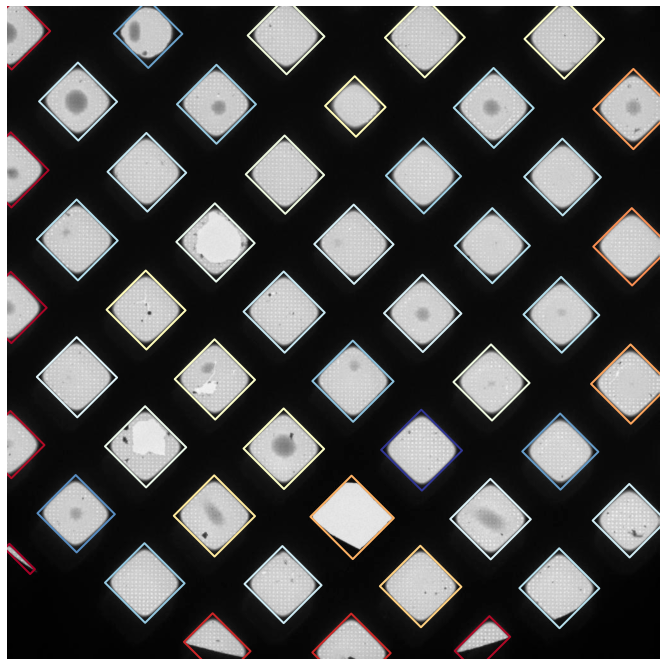

In [21]:
cropper = ptolemy.algorithms.LowMag_Process_Crops()
ex.get_crops(cropper)
model = models.LowMag_64x5_2ep()
model.load_state_dict(torch.load('weights/211215_lowmag_64x5_defaultadam_tightw_e2.torchmodel'))
wrapper = models.Wrapper(model)
ex.score_crops(wrapper)
ex.viz_boxes_and_scores()